# Wordcloud Visualisations

In [197]:
import os
import pandas as pd


In [198]:
#Load Data

df = pd.read_csv('All_MonsterSg.csv')

In [199]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [200]:
df.shape

(8415, 12)

# Cleaning Text

In [173]:
test = df['tech_stack'][8145]

In [175]:
test.split(',')

["['.NET'",
 " 'Information Technology'",
 " 'Web Technologies'",
 " 'Sql'",
 " 'Database Administration'",
 " 'Angular'",
 " 'Web Applications'",
 " 'Java'",
 " 'C#'",
 " 'Software Development'",
 " 'Negotiation'",
 " 'Talent Acquisition'",
 " 'Healthcare'",
 " 'financial transactions'",
 " 'Project Management'",
 " 'Architecture Design'",
 " 'experience design ']"]

In [13]:
test = df['job_description'][8145]

In [14]:
test.split('\r\n')

['Activate Interactive Pte Ltd (Activate) is a leading IT solution and service provider headquartered in Singapore with a presence in Malaysia and Indonesia. The homegrown company was founded in 1997 with the mission of positively impacting the lives of people around us and the environment we live in through the use of technology.',
 'We offer quality, cost-effective and impactful IT solutions and services, including mobile and web applications and cloud technology. Over the years, we have helped government agencies and enterprises remove technology roadblocks and increase their business efficiency to better serve the communities.',
 "To amplify our efforts in improving people's lives, Activate also develops preventive healthcare solutions that serve to increase health awareness and improve population health.",
 'We believe that the success of a company relies on the strengths of our employees. At Activate, we are committed to provide a conducive environment and develop our employees t

In [15]:
job_des = pd.DataFrame(data = df[df['job_description'].isna() == False]['job_description'])
job_des['description'] = 0
job_des['qualification'] = 0
job_des['requirement'] = 0
job_des['responsibilities'] = 0
job_des.reset_index(inplace=True, drop=True)

In [16]:
# number of postings with 'description', 'qualification', 'requirement', 'responsibilities'

for i, row in job_des.iterrows():    
        if 'description' in row['job_description'].lower():
            job_des['description'].iloc[i] = 1
        if 'qualification' in row['job_description'].lower():
            job_des['qualification'].iloc[i] = 1
        if 'requirement' in row['job_description'].lower():
            job_des['requirement'].iloc[i] = 1
        if 'responsibilities' in row['job_description'].lower():
            job_des['responsibilities'].iloc[i] = 1
            
job_des

C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,job_description,description,qualification,requirement,responsibilities
0,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,1,0,1,0
1,Job Description :\r\nJob summary\r\nDESCRIPTIO...,1,1,0,1
2,Responsibilities:\r\nProvide helpdesk support ...,0,0,1,1
3,Key Responsibilities\r\nPerforms all standard ...,0,0,0,1
4,Has developed specialized skills or is multi-s...,0,1,0,1
...,...,...,...,...,...
8399,Job Description:\r\nResponsible for overall pl...,1,0,1,0
8400,"Job Description:\r\nThe Senior Developer, IT p...",1,0,1,1
8401,Location: Paya Lebar\r\nWorking hours: 10am 11...,1,0,1,0
8402,"As a Director, you will be responsible for man...",0,0,1,1


In [25]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [27]:
df['tech_stack'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                     NaN
1                                                     NaN
2       ['Switches', 'Mac', 'Windows 10', 'Cloud Compu...
3       ['Scalability', 'Cloud Computing', 'Google Clo...
4       ['Scalability', 'Cloud Computing', 'Google Clo...
                              ...                        
8410    ['Pyspark', 'Scalability', 'Application Develo...
8411    ['Css3', 'Php', '.NET', 'Application Developme...
8412    ['Windows', 'Customer Service Skills', 'Custom...
8413    ['Wealth Management', 'Mentoring', 'Quality Co...
8414    ['Oracle', 'Erp', 'Application Development', '...
Name: tech_stack, Length: 8415, dtype: object>

In [62]:
df['tech_stack'].isnull().sum()

0

In [59]:
df.dropna(inplace = True, subset = ['tech_stack'])

In [64]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
5,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nIs proficient on prima...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
6,Customer Engineering Manager,Applied Materials South East Asia Pte. Ltd.,"['78000', '156000']",permanent,"['2', '5']","['Cloud Computing', 'Google Cloud Platform', '...",Key Responsibilities\r\nDevelops and maintains...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [94]:
df['industry'].value_counts()

['Other']                                                                            5105
['IT/Computers - Software']                                                           884
['Internet/E-commerce']                                                               686
['Banking/Accounting/Financial Services']                                             430
['Recruitment/Staffing/RPO']                                                          305
                                                                                     ... 
['Banking/Accounting/Financial Services', 'IT/Computers - Hardware & Networking']       1
['Education/Teaching']                                                                  1
['IT/Computers - Software', 'Internet/E-commerce']                                      1
['Quality Control/Assurance']                                                           1
['Health Care']                                                                         1
Name: indu

In [151]:
def cleaning_last_element(x):
    index = len(x)
    
    if type(x) == str:
        final_string = x[0:-1]
        return final_string
    elif type(x) == list:
        
        mid_string = x[index-1]

        final_string = mid_string[0:-2]

        x.pop()

        x.append(final_string)
    
        return x

In [152]:
test_list = ['Switches', 'Mac', 'Windows 10 ']

test = 'Switches '

# print(test)

cleaning_last_element(test_list)



['Switches', 'Mac']

In [153]:
cleaning_last_element(test)

'Switches'

In [154]:
df.dropna(inplace = True, subset = ['tech_stack'])

In [155]:
df.shape

(5722, 13)

In [140]:
df["new_tech_stack"] = df["tech_stack"].apply(cleaning_last_element)

In [141]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url,new_tech_stack
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['Switches', 'Mac', 'Windows 10', 'Cloud Compu..."
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['Scalability', 'Cloud Computing', 'Google Clo..."
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['Scalability', 'Cloud Computing', 'Google Clo..."
5,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nIs proficient on prima...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['Scalability', 'Cloud Computing', 'Google Clo..."
6,Customer Engineering Manager,Applied Materials South East Asia Pte. Ltd.,"['78000', '156000']",permanent,"['2', '5']","['Cloud Computing', 'Google Cloud Platform', '...",Key Responsibilities\r\nDevelops and maintains...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['Cloud Computing', 'Google Cloud Platform', '..."


# EDA

In [288]:
df = pd.read_csv('All_MonsterSg.csv')

In [289]:
df.head(2)

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...


<AxesSubplot:>

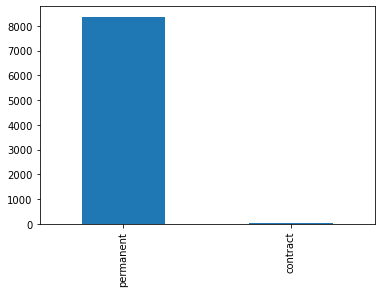

In [290]:
df['job_type'].value_counts().plot(kind='bar')

# Wordcloud

## Job Title

In [380]:
df = pd.read_csv('All_MonsterSg.csv')

In [357]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

In [358]:
word_list = df['job_title']

In [359]:
word_could_dict = Counter(word_list)

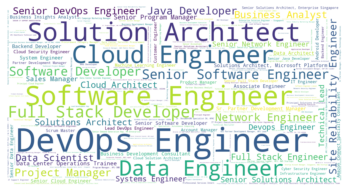

In [360]:
wordcloud = WordCloud(width = 1500, height = 800, background_color="white").generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("word_test.png")

In [361]:
word_could_dict

Counter({'Senior Python Developer': 2,
         'Senior Partner Solutions Architect (Microsoft)': 2,
         'IT Technician': 3,
         'Customer Engineer': 8,
         'Customer Engineering Manager': 1,
         'Cloud Engineer (Automation)': 4,
         'Senior Software and Automation Architect': 2,
         'Manager (Security And Compliance)': 2,
         'Solution Test Engineer (Smart Campus)': 2,
         'Senior Account Executive- SEA - Public Sector & Strategic Accounts': 4,
         'Senior Technical Support Engineer': 3,
         'Software Engineer': 50,
         '22422778 SOC Advanced Cyber Defense Analyst (AVP)': 2,
         'IS Cloud Applications Services Specialist': 3,
         'Staff Architect': 3,
         'Cloud Container Engineer': 2,
         'Cloud Architect': 14,
         'Account Manager': 8,
         'Security Consultant (Application and Database Security)': 1,
         'Cloud Engineer': 43,
         'Server Engineer': 4,
         'Senior Executive - Client Se

### Job Title with Salary Plot

In [487]:
df = pd.read_csv('All_MonsterSg.csv')

In [488]:
df['job_title'].value_counts()

DevOps Engineer                                                81
Software Engineer                                              50
Solution Architect                                             47
Data Engineer                                                  43
Cloud Engineer                                                 43
                                                               ..
Team Lead Engineer                                              1
Senior Cyber Security Consultant (Data Protection)              1
DevSecOps Consultant                                            1
IT Manager, Cyber Security (IT/ Digital Learning/Up to $7k)     1
Senior Solution Manager                                         1
Name: job_title, Length: 5706, dtype: int64

In [489]:
mid_df = df

In [490]:
mid_df['salary']

0                        NaN
1                        NaN
2         ['24000', '36000']
3         ['42000', '84000']
4         ['46800', '93600']
                ...         
8410    ['108000', '156000']
8411      ['66000', '78000']
8412      ['26400', '30000']
8413    ['120000', '240000']
8414    ['120000', '168000']
Name: salary, Length: 8415, dtype: object

In [491]:
mid_df.shape

(8415, 12)

In [492]:
mid_df = mid_df.dropna(subset = ['salary'])

In [493]:
mid_df.shape

(4770, 12)

In [494]:
def cleaning_salary(x):
    mid_string = x[1:-1]
    new_list = mid_string.split(', ')
    
    return new_list

In [495]:
mid_df['new_salary'] = mid_df['salary'].apply(cleaning_salary)

C:\Users\Darren\AppData\Local\Temp/ipykernel_24724/1323390140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_df['new_salary'] = mid_df['salary'].apply(cleaning_salary)


In [496]:
mid_df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url,new_salary
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['24000', '36000']"
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['42000', '84000']"
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['46800', '93600']"
5,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nIs proficient on prima...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['46800', '93600']"
6,Customer Engineering Manager,Applied Materials South East Asia Pte. Ltd.,"['78000', '156000']",permanent,"['2', '5']","['Cloud Computing', 'Google Cloud Platform', '...",Key Responsibilities\r\nDevelops and maintains...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,"['78000', '156000']"


In [497]:
def cleaning_salary_2(x):
    new_list = []
    for i in x:
        new_list.append(int(i[1:-1]))
        
    return new_list

In [498]:
mid_df['new_salary'] = mid_df['new_salary'].apply(cleaning_salary_2)

C:\Users\Darren\AppData\Local\Temp/ipykernel_24724/1257713665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_df['new_salary'] = mid_df['new_salary'].apply(cleaning_salary_2)


In [499]:
mid_df.tail(2)

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url,new_salary
8413,"Director, Virtual Banking",Synpulse Singapore Pte. Ltd.,"['120000', '240000']",permanent,"['7', '10']","['Wealth Management', 'Mentoring', 'Quality Co...","As a Director, you will be responsible for man...",['Other'],['Banking'],['Product Manager - Auto/Home/Personal Loan'],2022-03-19,https://www.monster.com.sg/seeker/job-details?...,"[120000, 240000]"
8414,"Senior IT Manager (Oracle) / Senior Manager, I...",Randstad Pte. Limited,"['120000', '168000']",permanent,"['10', '15']","['Oracle', 'Erp', 'Application Development', '...",About the company\r\nOur Client is a market le...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-03-19,https://www.monster.com.sg/seeker/job-details?...,"[120000, 168000]"


In [500]:
mid_dict = {'DevOps Engineer':[] , 'Software Engineer' : [], 'Solution Architect' : [], 'Cloud Engineer' : [], 'Data Engineer': []}

In [501]:
type(mid_dict)

dict

In [502]:
for i in range(len(mid_df)):
    job_title = mid_df['job_title'].iloc[i]
    salary_list = mid_df['new_salary'].iloc[i]
    
#     print(job_title)
    
    if job_title in mid_dict.keys():
        for i in salary_list:
            if i == '1' or i == 1:
                continue
            elif int(i) > 500000:
                continue
            else:
                mid_dict[job_title].append(int(i))
                mid_dict[job_title].sort()
#         print(job_title)
    

In [503]:
mid_dict

{'DevOps Engineer': [28800,
  30000,
  33600,
  36000,
  36000,
  42000,
  42000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  48000,
  54000,
  54000,
  54000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  60000,
  66000,
  66000,
  66000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  72000,
  78000,
  78000,
  78000,
  78000,
  78000,
  78000,
  84000,
  84000,
  84000,
  84000,
  84000,
  90000,
  90000,
  90000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  96000,
  102000,
  102000,
  102000,
  102000,
  102000,
  102000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  108000,
  120000,
  120000,
  120000,
  120000,
  120000,
  12

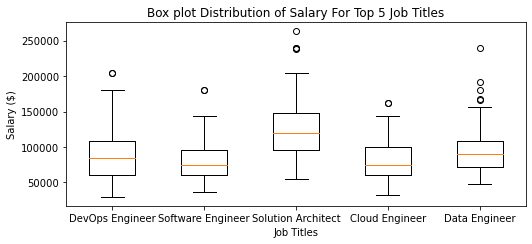

In [510]:
from matplotlib import pyplot as plt
labels, data = [*zip(*mid_dict.items())]

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)

plt.xlabel('Job Titles')
plt.ylabel('Salary ($)') 
plt.title('Box plot Distribution of Salary For Top 5 Job Titles')
plt.savefig('foo.png', bbox_inches='tight')


plt.show()



# Tech Stack

In [347]:
df = pd.read_csv('All_MonsterSg.csv')

In [348]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [349]:
df.dropna(inplace = True, subset = ['tech_stack'])

In [350]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
5,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nIs proficient on prima...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
6,Customer Engineering Manager,Applied Materials South East Asia Pte. Ltd.,"['78000', '156000']",permanent,"['2', '5']","['Cloud Computing', 'Google Cloud Platform', '...",Key Responsibilities\r\nDevelops and maintains...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [351]:
def cleaning_tech_stack(x):
    mid_string = x[1:-3] + x[-2:-1]
    new_list = mid_string.split(', ')
    
    return new_list

In [352]:
df['new_teck_stack'] = df['tech_stack'].apply(cleaning_tech_stack)

In [353]:
df['new_teck_stack'].head()

2    ['Switches', 'Mac', 'Windows 10', 'Cloud Compu...
3    ['Scalability', 'Cloud Computing', 'Google Clo...
4    ['Scalability', 'Cloud Computing', 'Google Clo...
5    ['Scalability', 'Cloud Computing', 'Google Clo...
6    ['Cloud Computing', 'Google Cloud Platform', '...
Name: new_teck_stack, dtype: object

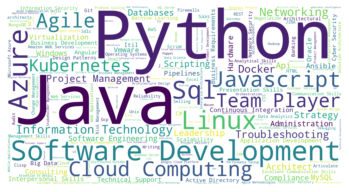

In [355]:
word_list = []

for i in df['new_teck_stack']:
    for t in i:
        word_list.append(t[1:-1])

# word_list = df['new_teck_stack']

word_could_dict = Counter(word_list)

wordcloud = WordCloud(width = 1500, height = 800, background_color="white").generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("word_test.png")

# Industry

In [338]:
df = pd.read_csv('All_MonsterSg.csv')

In [339]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [340]:
df.dropna(inplace = True, subset = ['industry'])

In [341]:
df.shape

(8403, 12)

In [342]:
def cleaning_industry(x):
    mid_string = x[2:-2]
#     new_list = mid_string.split(', ')
    
    return mid_string

In [343]:
df['new_industry'] = df['industry'].apply(cleaning_industry)

In [344]:
df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url,new_industry
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...,Banking/Accounting/Financial Services
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...,Internet/E-commerce
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,Other
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,Other
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,Other


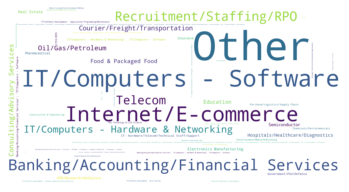

In [346]:
word_list = []

for i in df['new_industry']:
    word_list.append(i)

# word_list = df['new_teck_stack']

word_could_dict = Counter(word_list)

wordcloud = WordCloud(width = 1500, height = 800, background_color="white").generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("word_test.png")

# Roles

In [301]:
df = pd.read_csv('All_MonsterSg.csv')

In [303]:
df.shape

(8415, 12)

In [304]:
df.dropna(inplace = True, subset = ['roles'])

In [300]:
df.head(2)

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...


In [305]:
df.shape

(7906, 12)

In [333]:
def cleaning_roles(x):
    mid_string = x[1:-1]
    new_list = mid_string.split(', ')
    
    return new_list

In [334]:
df['new_roles'] = df['roles'].apply(cleaning_roles)

In [335]:
df.head(10)

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url,new_roles
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...,['Software Engineer/Programmer']
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...,['Software Engineer/Programmer']
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Software/Hardware/EDP']
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Production/Engineering/R&D']
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Production/Engineering/R&D']
5,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nIs proficient on prima...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Production/Engineering/R&D']
6,Customer Engineering Manager,Applied Materials South East Asia Pte. Ltd.,"['78000', '156000']",permanent,"['2', '5']","['Cloud Computing', 'Google Cloud Platform', '...",Key Responsibilities\r\nDevelops and maintains...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Production/Engineering/R&D']
7,Cloud Engineer (Automation),Recruit Expert Pte. Ltd.,"['48000', '66000']",permanent,"['2', '5']","['Puppet', 'Cloud Applications', 'Cloud Securi...","In-charge of the design, deployment, installat...",['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Software/Hardware/EDP']
8,Cloud Engineer (Automation),Recruit Expert Pte. Ltd.,"['48000', '60000']",permanent,"['2', '5']","['Puppet', 'Cloud Applications', 'Cloud Securi...","In-charge of the design, deployment, installat...",['Other'],['IT'],['Other Software/Hardware/EDP'],2022-03-14,https://www.monster.com.sg/seeker/job-details?...,['Other Software/Hardware/EDP']
9,Senior Software and Automation Architect,Cisco International Limited Singapore Branch,"['108000', '180000']",permanent,"['10', '15']","['Kubernetes', 'Cloud Computing', 'JIRA', 'Pyt...",What You'll Do\r\nCisco Customer Experience (C...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...,['Other Software/Hardware/EDP']


In [336]:
for i in range(len(df)):
    print(len(df['new_roles'].loc[i]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
2
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyError: 92

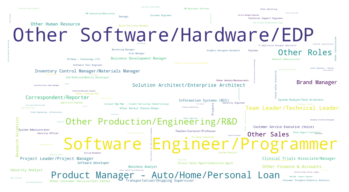

In [337]:
word_list = []

for i in df['new_roles']:
    for t in i:
        word_list.append(t[1:-1])

# word_list = df['new_teck_stack']

word_could_dict = Counter(word_list)

wordcloud = WordCloud(width = 1500, height = 800, background_color="white").generate_from_frequencies(word_could_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("word_test.png")

# Job Description

In [258]:
df = pd.read_csv('All_MonsterSg.csv')


df.head()

,job_title,company,salary,job_type,years_experience,tech_stack,job_description,industry,function,roles,date_posted,url
0,Senior Python Developer,Citi,NaN,permanent,NaN,NaN,Job Description :\r\n\r\nJob Purpose:\r\nWe ar...,['Banking/Accounting/Financial Services'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
1,Senior Partner Solutions Architect (Microsoft),Amazon,NaN,permanent,NaN,NaN,Job Description :\r\nJob summary\r\nDESCRIPTIO...,['Internet/E-commerce'],['IT'],['Software Engineer/Programmer'],2022-02-18,https://www.monster.com.sg/seeker/job-details?...
2,IT Technician,Ascend Com Pte. Ltd.,"['24000', '36000']",permanent,"['2', '5']","['Switches', 'Mac', 'Windows 10', 'Cloud Compu...",Responsibilities:\r\nProvide helpdesk support ...,['Other'],['IT'],['Other Software/Hardware/EDP'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
3,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['42000', '84000']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Key Responsibilities\r\nPerforms all standard ...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...
4,Customer Engineer,Applied Materials South East Asia Pte. Ltd.,"['46800', '93600']",permanent,"['2', '5']","['Scalability', 'Cloud Computing', 'Google Clo...",Has developed specialized skills or is multi-s...,['Other'],['Manufacturing/Engineering/R&D'],['Other Production/Engineering/R&D'],2022-02-19,https://www.monster.com.sg/seeker/job-details?...


In [259]:
df['job_description']

0       Job Description :\r\n\r\nJob Purpose:\r\nWe ar...
1       Job Description :\r\nJob summary\r\nDESCRIPTIO...
2       Responsibilities:\r\nProvide helpdesk support ...
3       Key Responsibilities\r\nPerforms all standard ...
4       Has developed specialized skills or is multi-s...
                              ...                        
8410    Job Description:\r\nResponsible for overall pl...
8411    Job Description:\r\nThe Senior Developer, IT p...
8412    Location: Paya Lebar\r\nWorking hours: 10am 11...
8413    As a Director, you will be responsible for man...
8414    About the company\r\nOur Client is a market le...
Name: job_description, Length: 8415, dtype: object

# Reference Codes

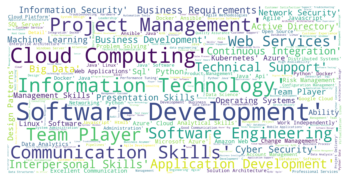

In [159]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=2000, height=1000).generate(text_joined2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



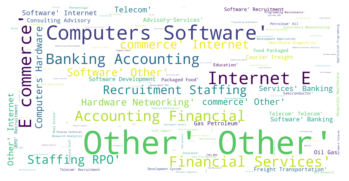

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
text_joined3 = " ".join(one_row for one_row in df['industry'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=2000, height=1000).generate(text_joined3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(20,10) )
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud.png', bbox_inches='tight')